# Census Income

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). **The prediction task is to determine whether a person makes over $50K a year.**

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [19]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

# EDA

## Static Analysis

In [21]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


First 10 data

In [22]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Last 10 data 

In [23]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns in the dataset.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Form the above code, we can see there is no null values, we have int64(6), object(9) dtypes and  memory used is 3.7+ MB

In [25]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From the above code we can see that there is no null values

In [26]:
df.nunique().to_frame()

,0
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


From the above code we can see that Fnlwgt,age,Capital_gain, capital_loss, and Hours_per_week and Native_country are continues value and other are categorical value.

In [27]:
for col in df.select_dtypes(exclude='object').columns:
    print(f"{col}:")
    print(df[col].value_counts())
    print("\n\n")

Age:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64



Fnlwgt:
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64



Education_num:
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64



Capital_gain:
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64



Capital_loss:
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capi

From the above code we can see that integer value have no problem.

In [28]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:")
    print(df[col].value_counts())
    print("\n\n")

Workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64



Education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64



Marital_status:
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64



Occupation:
 Prof-speci

From the above code Workclass have a value ? is 1836 time occurs which is unknown, Occupation have ? value occurs 1843, Native_country have ? value 683 times

In [29]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From description:-

1.All column have 32560 values so no missing value present.

2.The std is high for mean.

3.All the minimum value are value and possible

4.The difference between min,25%,50%,75% and max is not normal for:-
- Captial_gain
- Capital_loss
- Hours_per_week
- Age
- Fnlwgt

5.The mean value is  higher than median (50%), which means data is right skewed
- Age
- Fnlwgt
- Capital_loss
- Capital_gain

## Graphical Analysis

### Univarient Analysis

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# df2 will have only datatype int 64 in it
df2= df.select_dtypes(include='int64')

In [32]:
# dfo will have only datatype object in it
dfo=df.select_dtypes(include='object')

In [33]:
dfo.shape

(32560, 9)

In [34]:
# Checking the shape of dataframe contating integre values
df2.shape

(32560, 6)

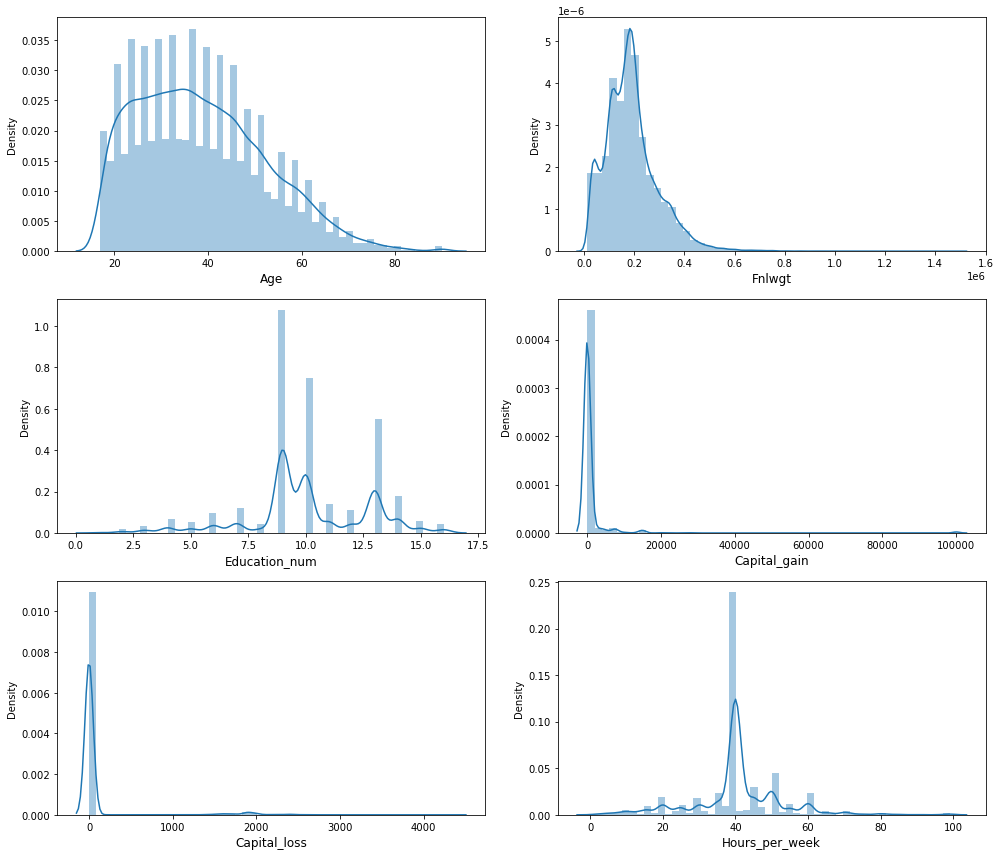

In [35]:
# Cretaing loop for finding the distribution of continuies values
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for col in df2:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df2[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above graph we can see that,
- Capital gain,Fnlwgt,Age and capital loss is right skewed

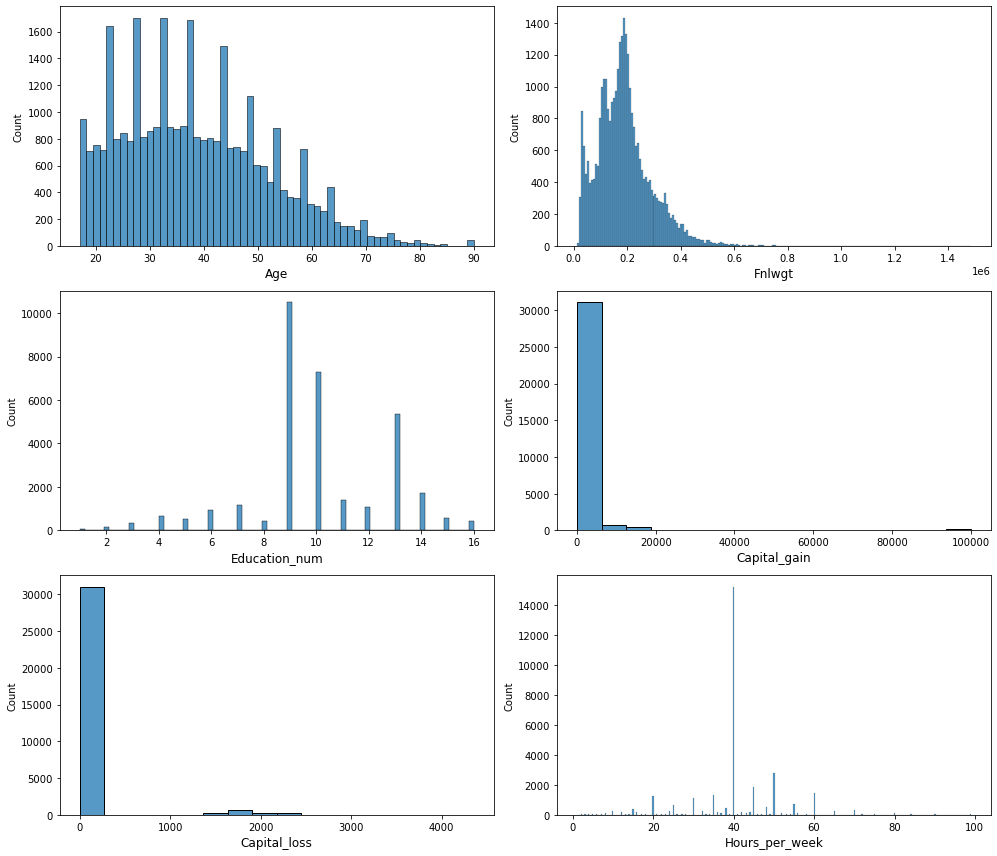

In [37]:
# Cretaing loop for finding the distribution of continuies values
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for col in df2:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.histplot(df2[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above graph we can see that
- age is ranging between 10-90 and most frequency is at 25 and 35.
- Fnlwgt is ranging between le6 0 to le6 1.4 and most frequency is at le6 0.2
- Education_num is ranging between 1 to 16 and most frequency is at 9
- Capital_gain is ranging between 0 to 100000 and most frequency is near 0-6666
- Capital_loss is ranging between 0 to 4000 and most frequency is near 0-666
- Hours_per_week is ranging between 0 to 100 and most frequency at 40

### By-varient Analysis

In [40]:
dfo.nunique()

Workclass          9
Education         16
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

In [51]:
dfo['Workclass']

0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object

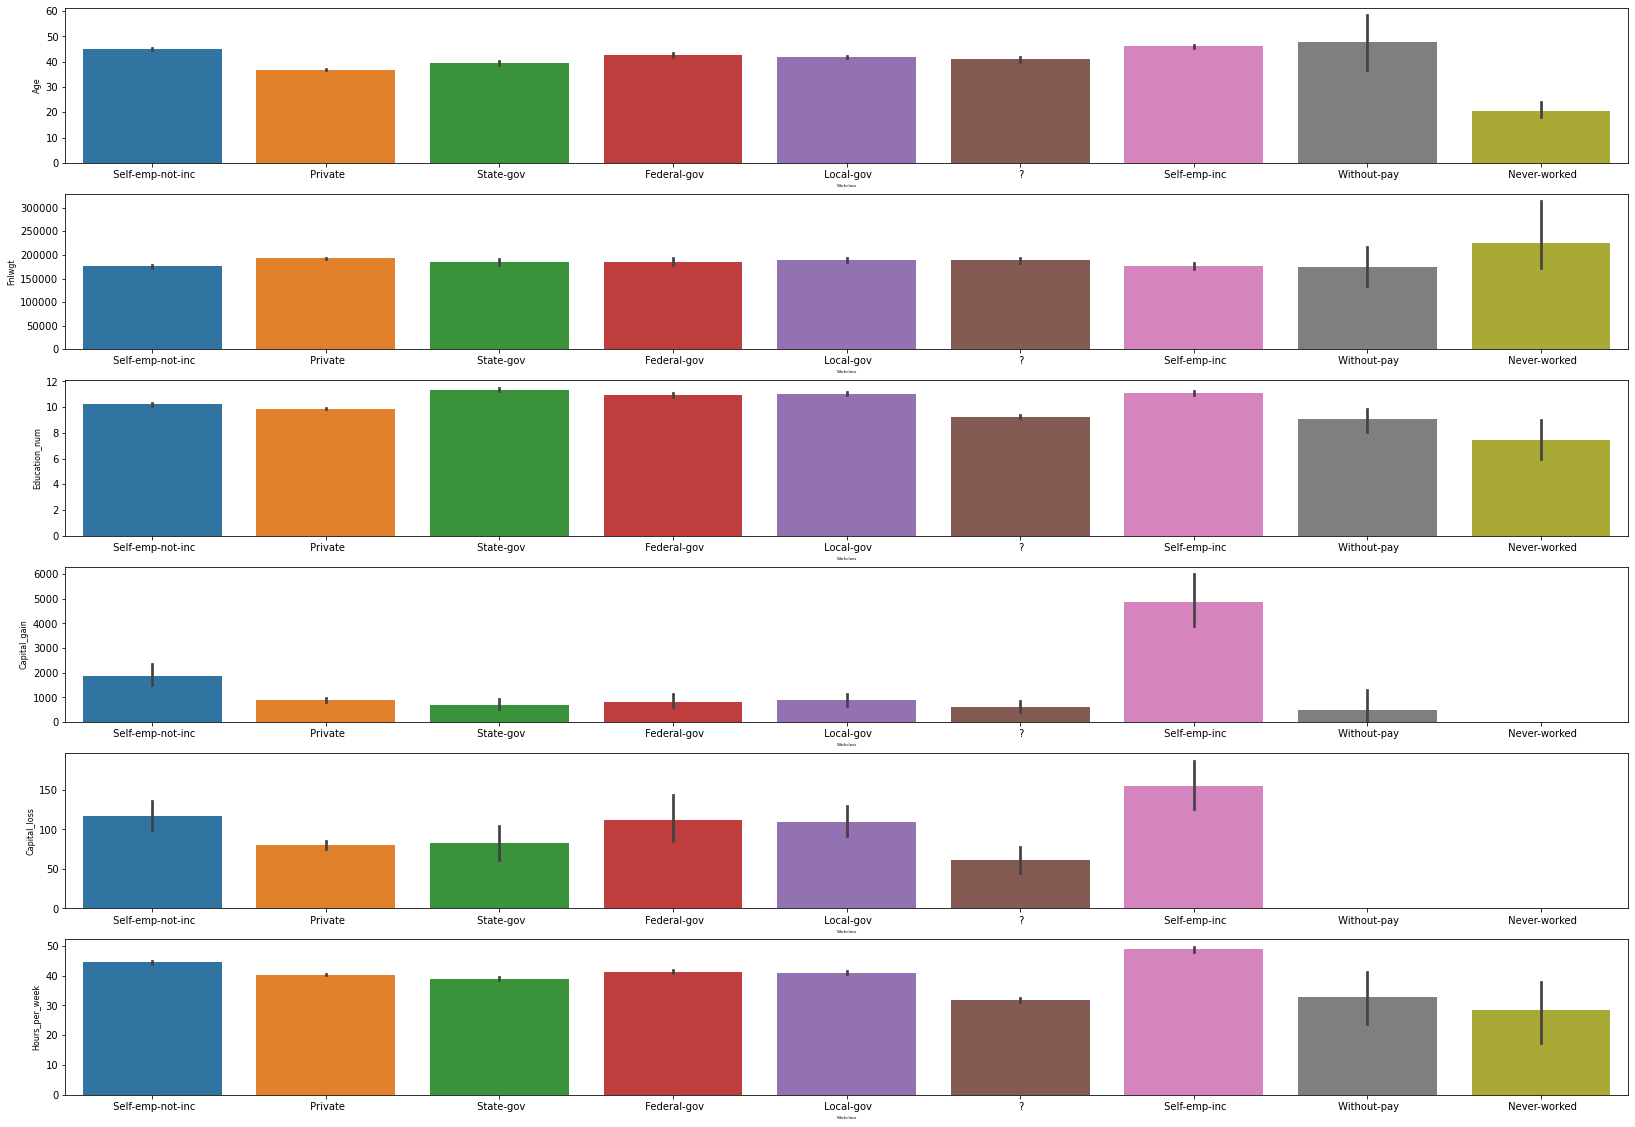

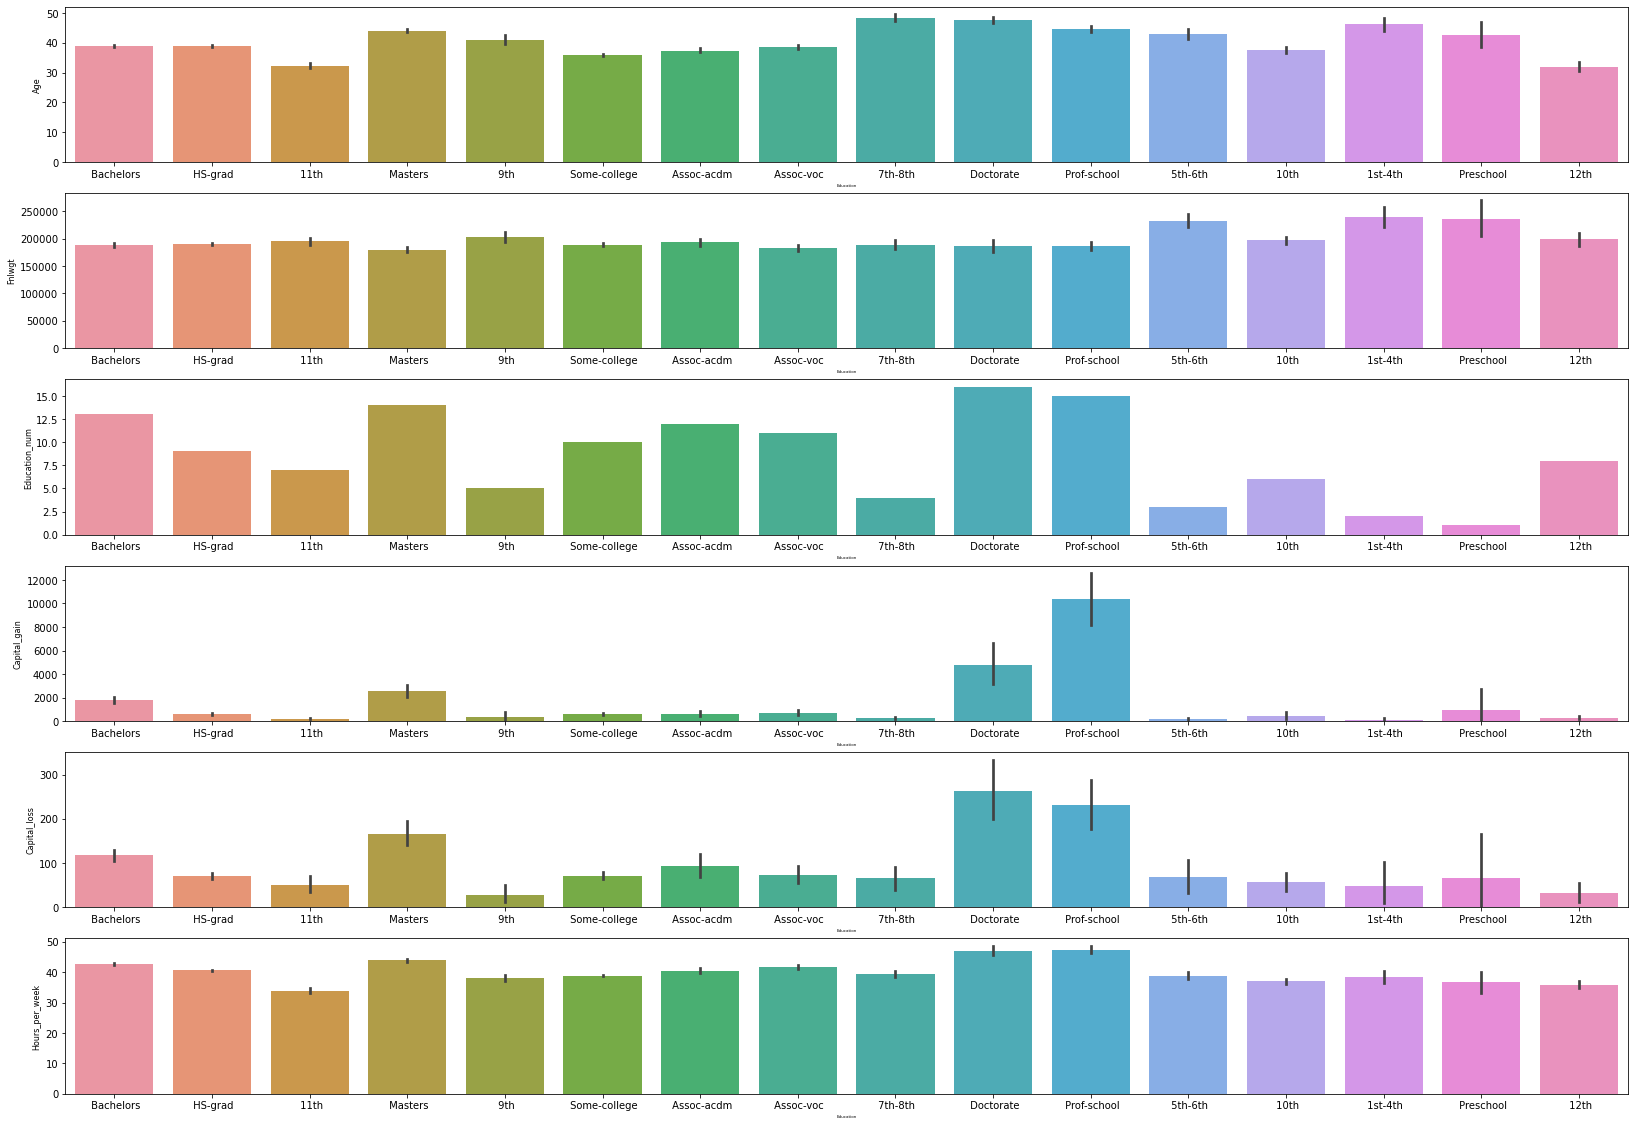

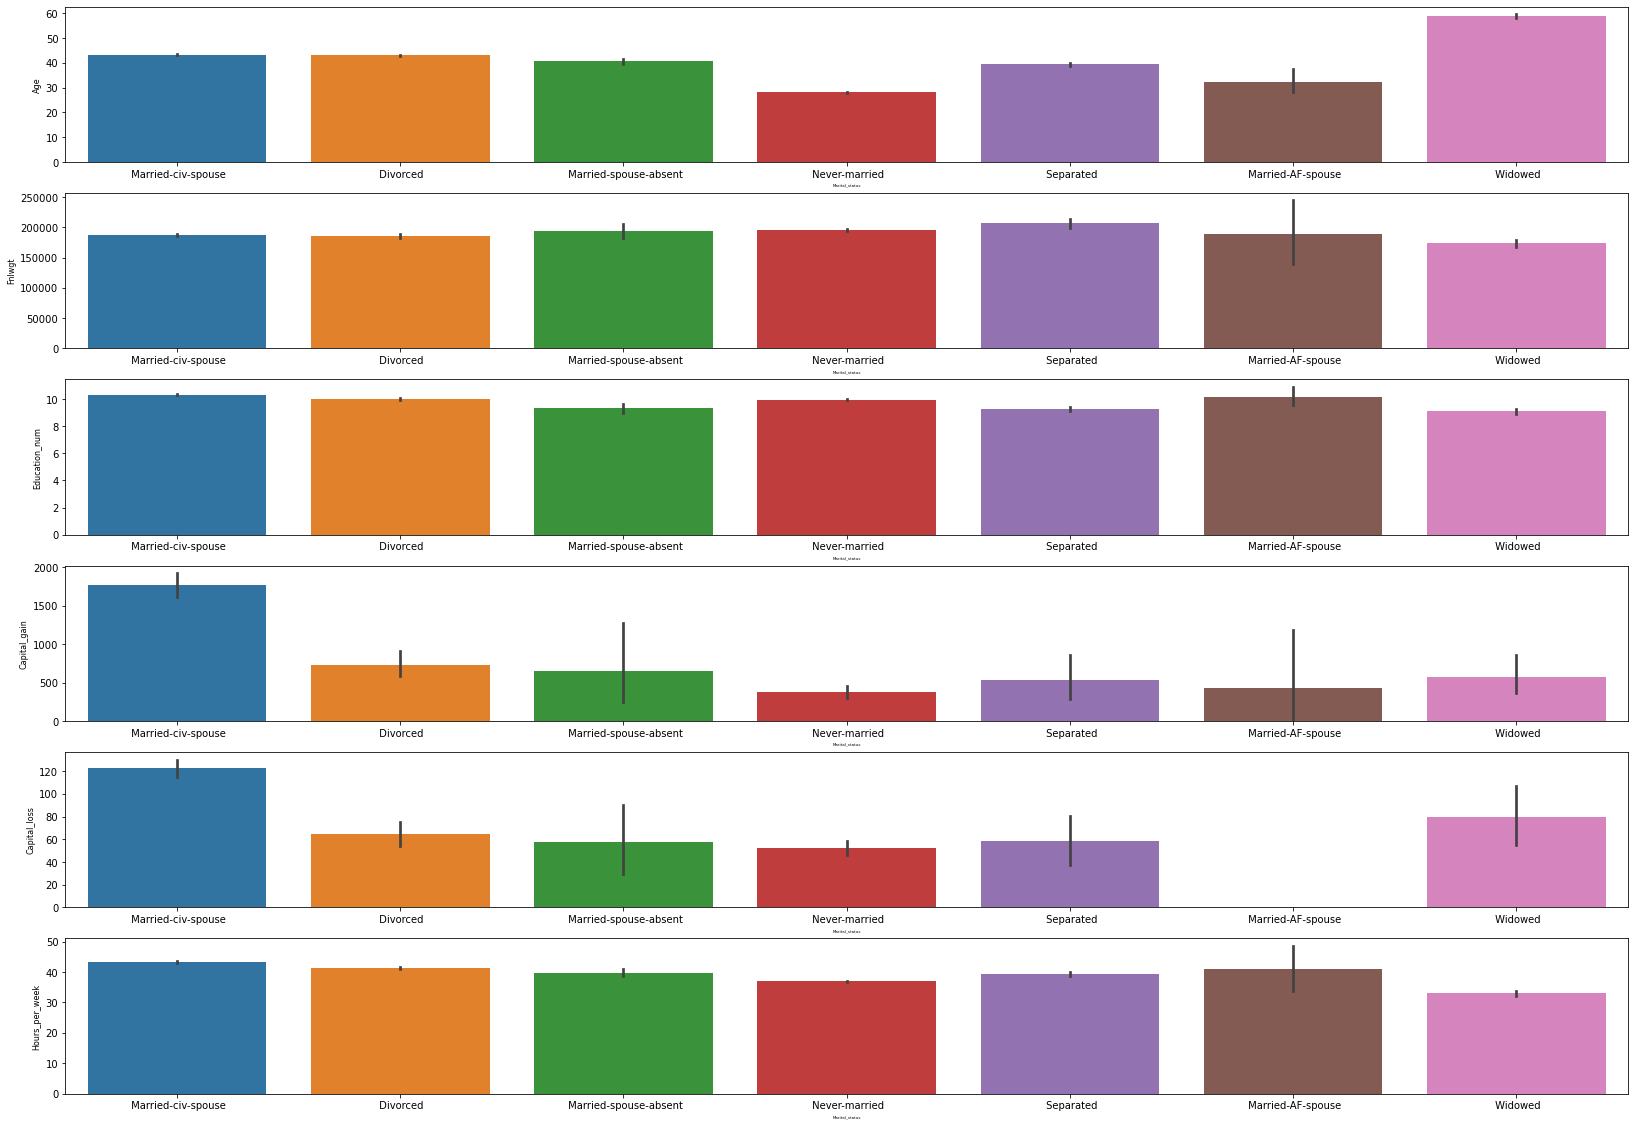

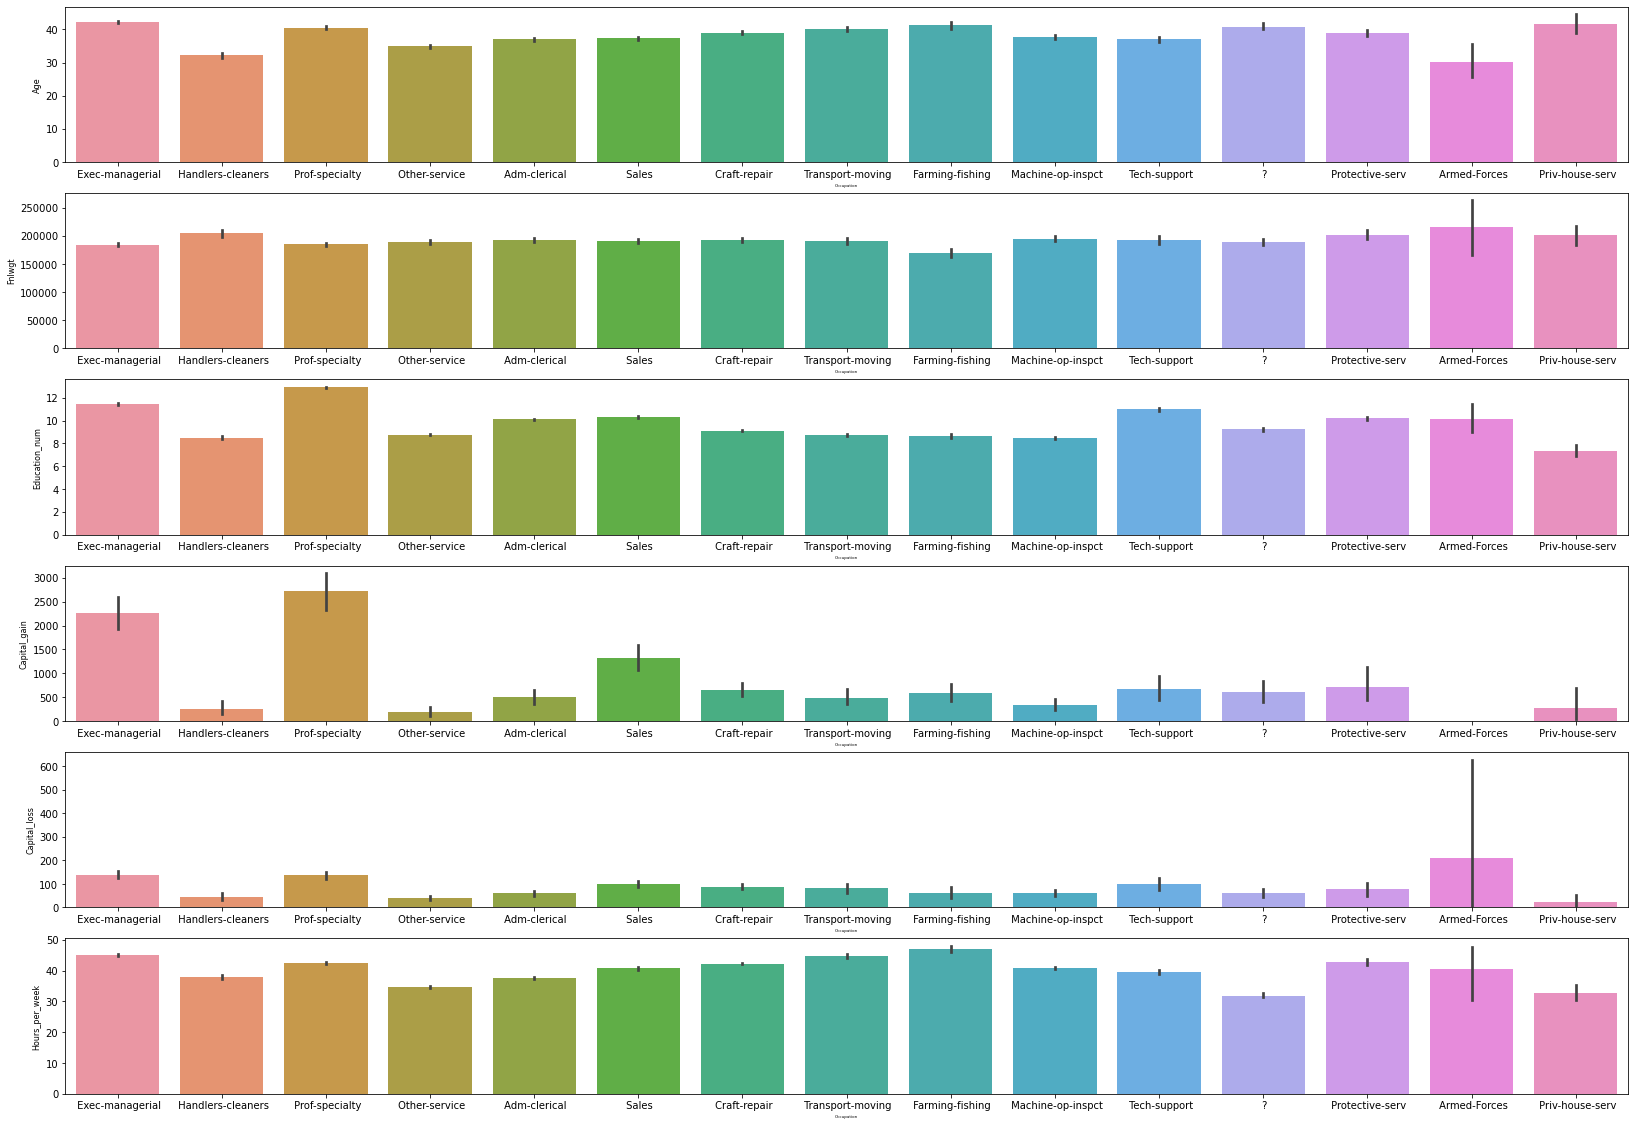

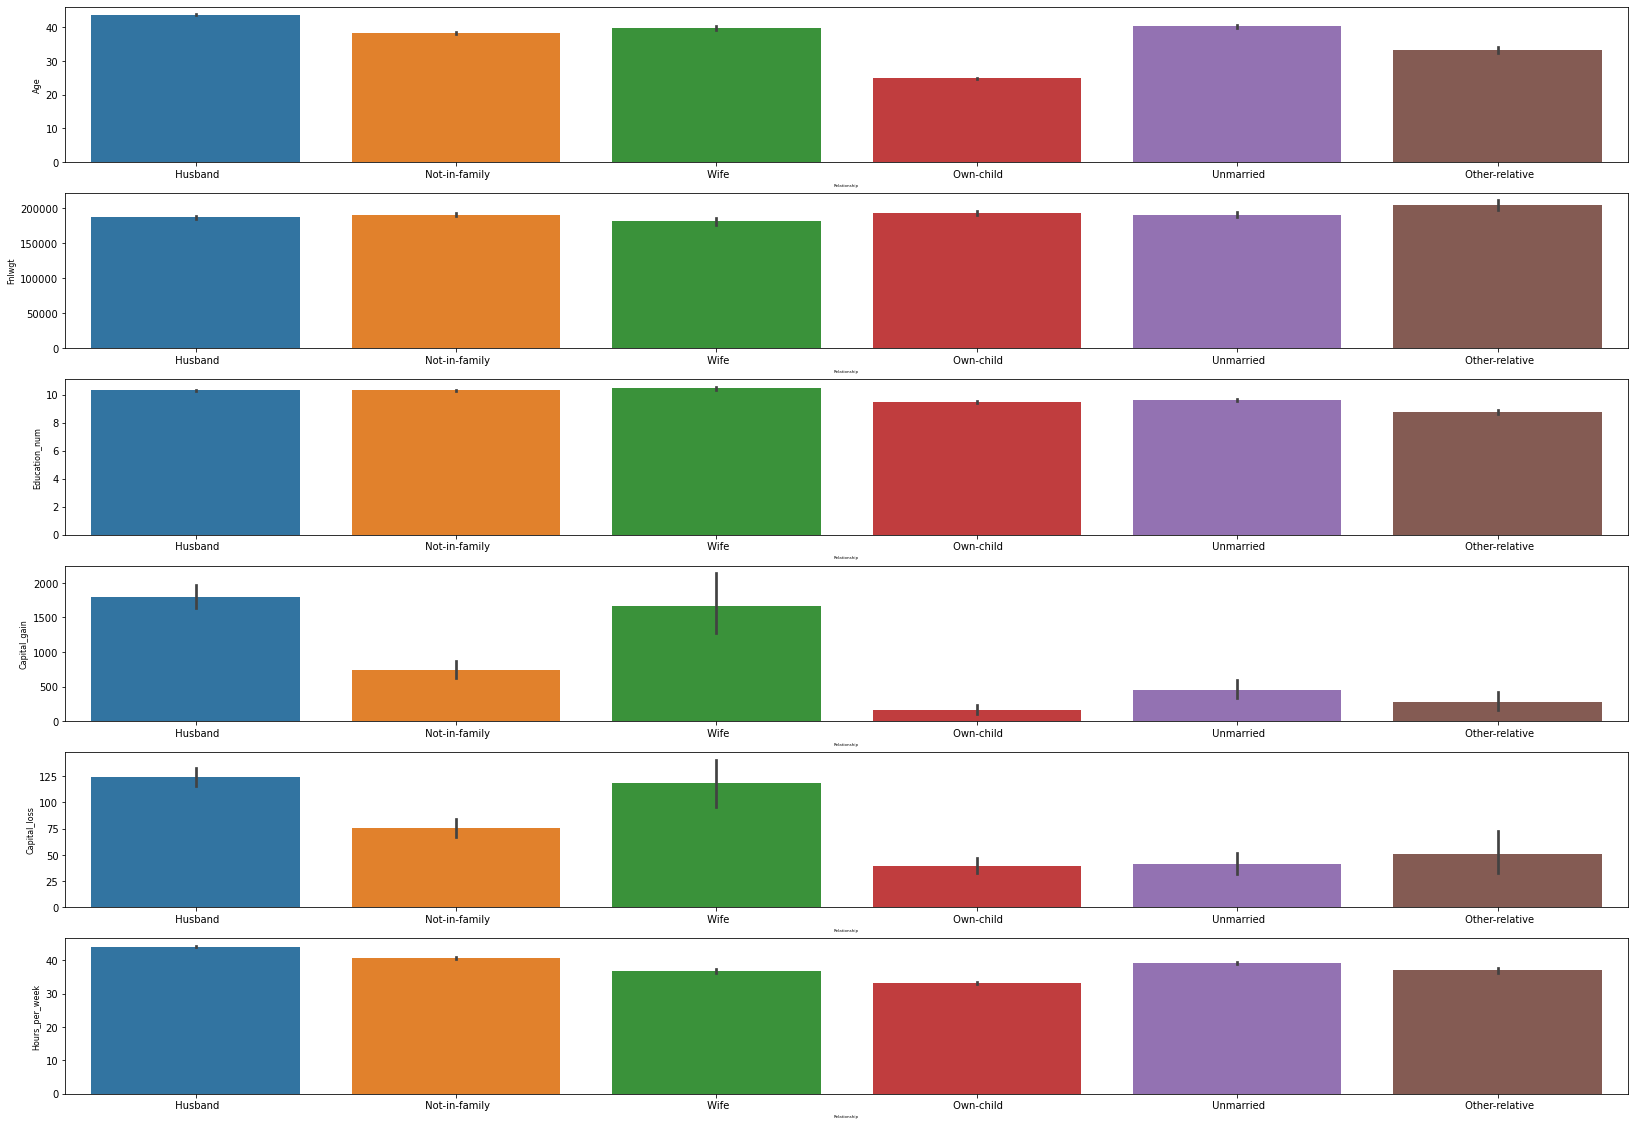

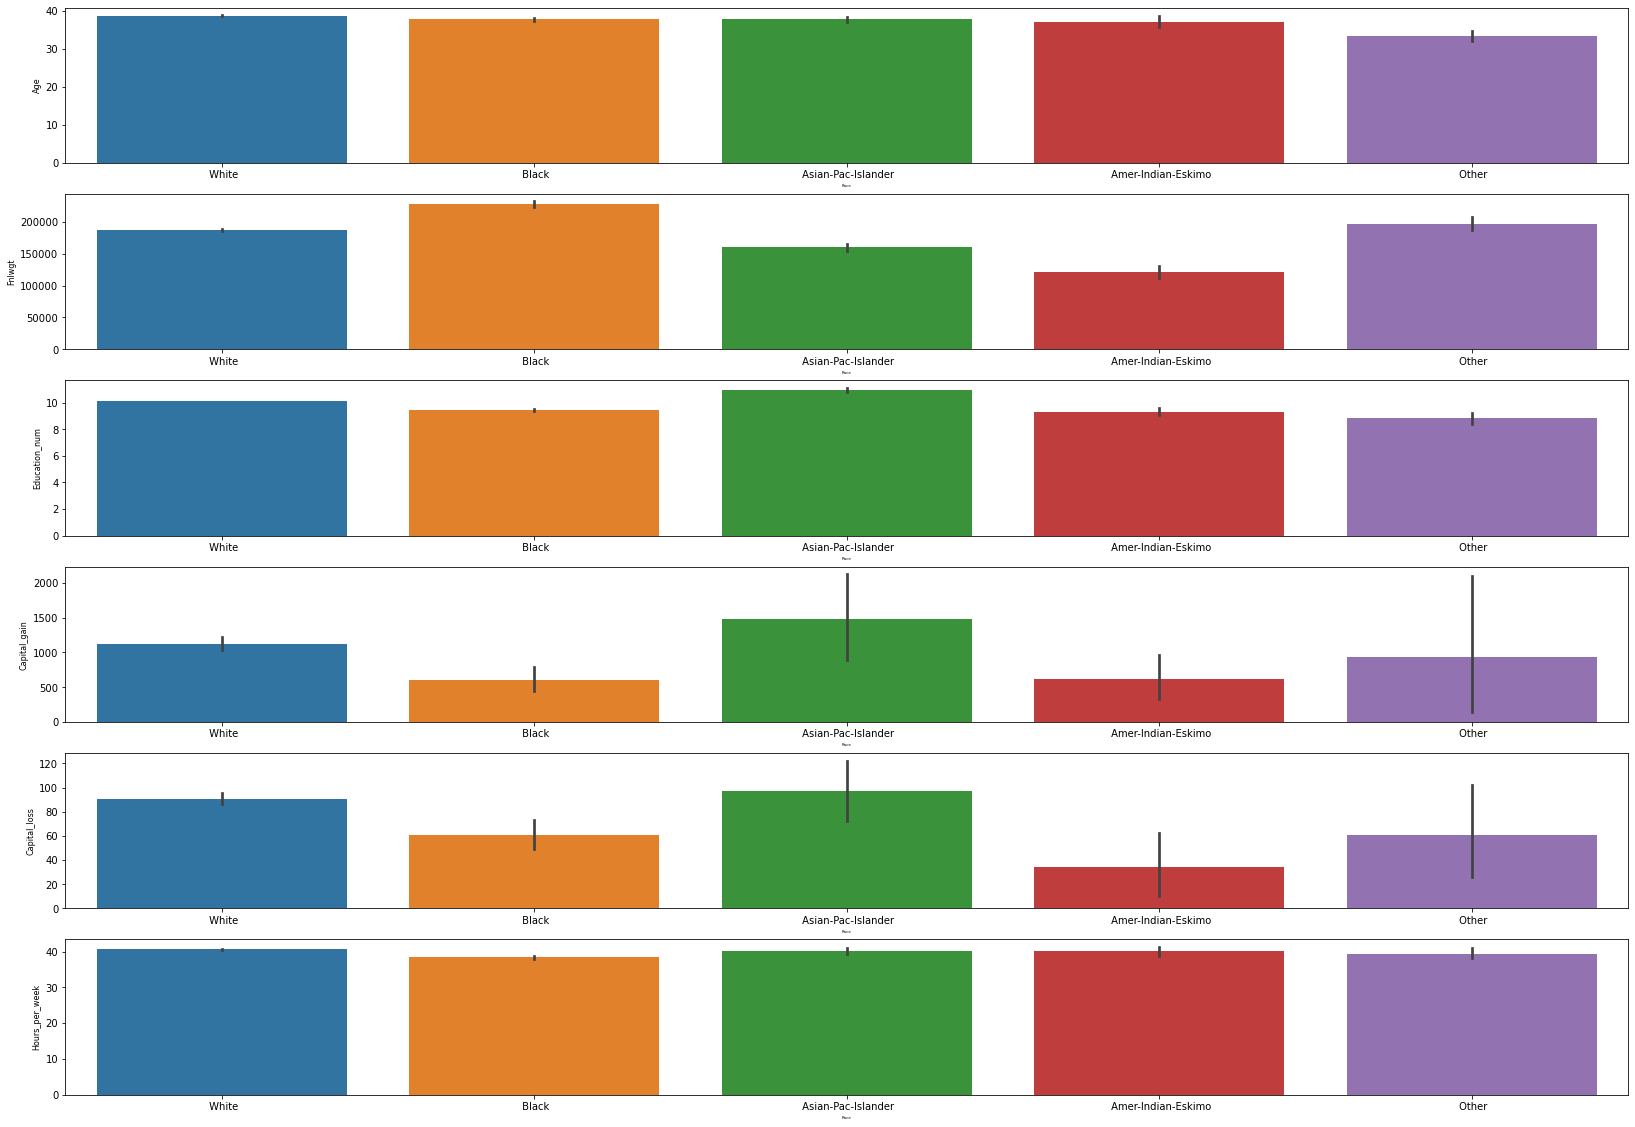

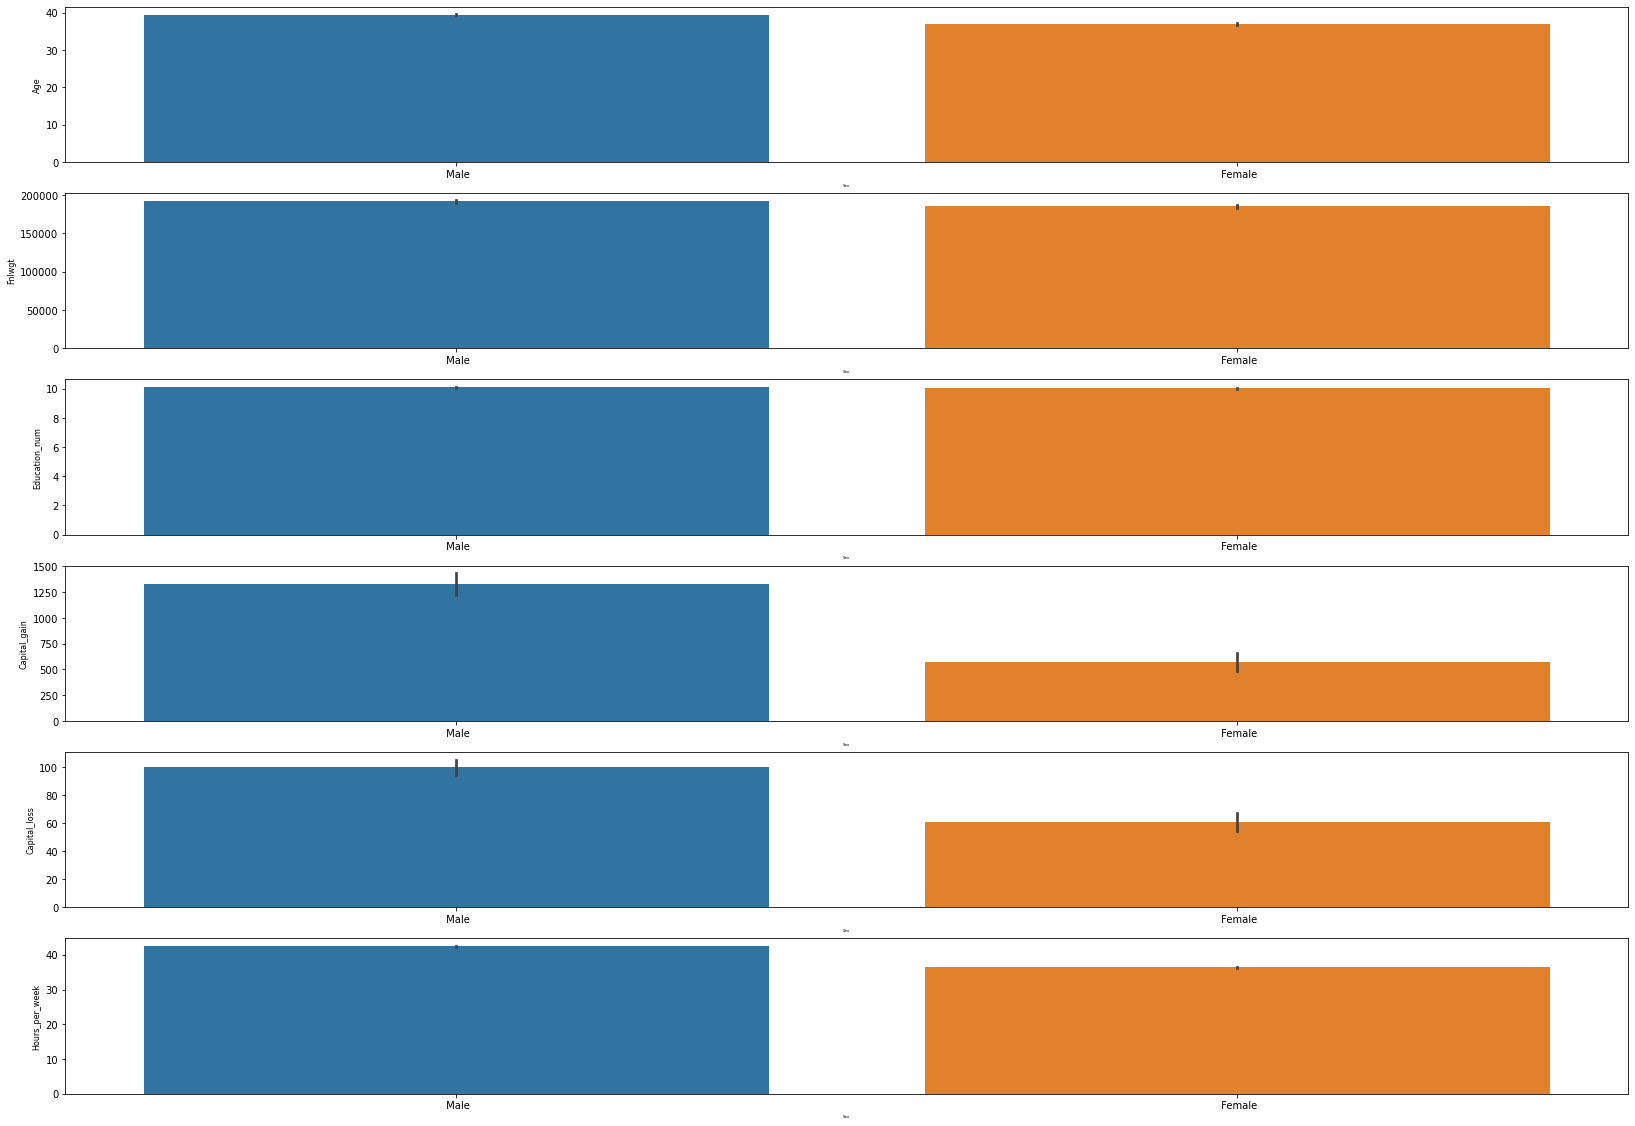

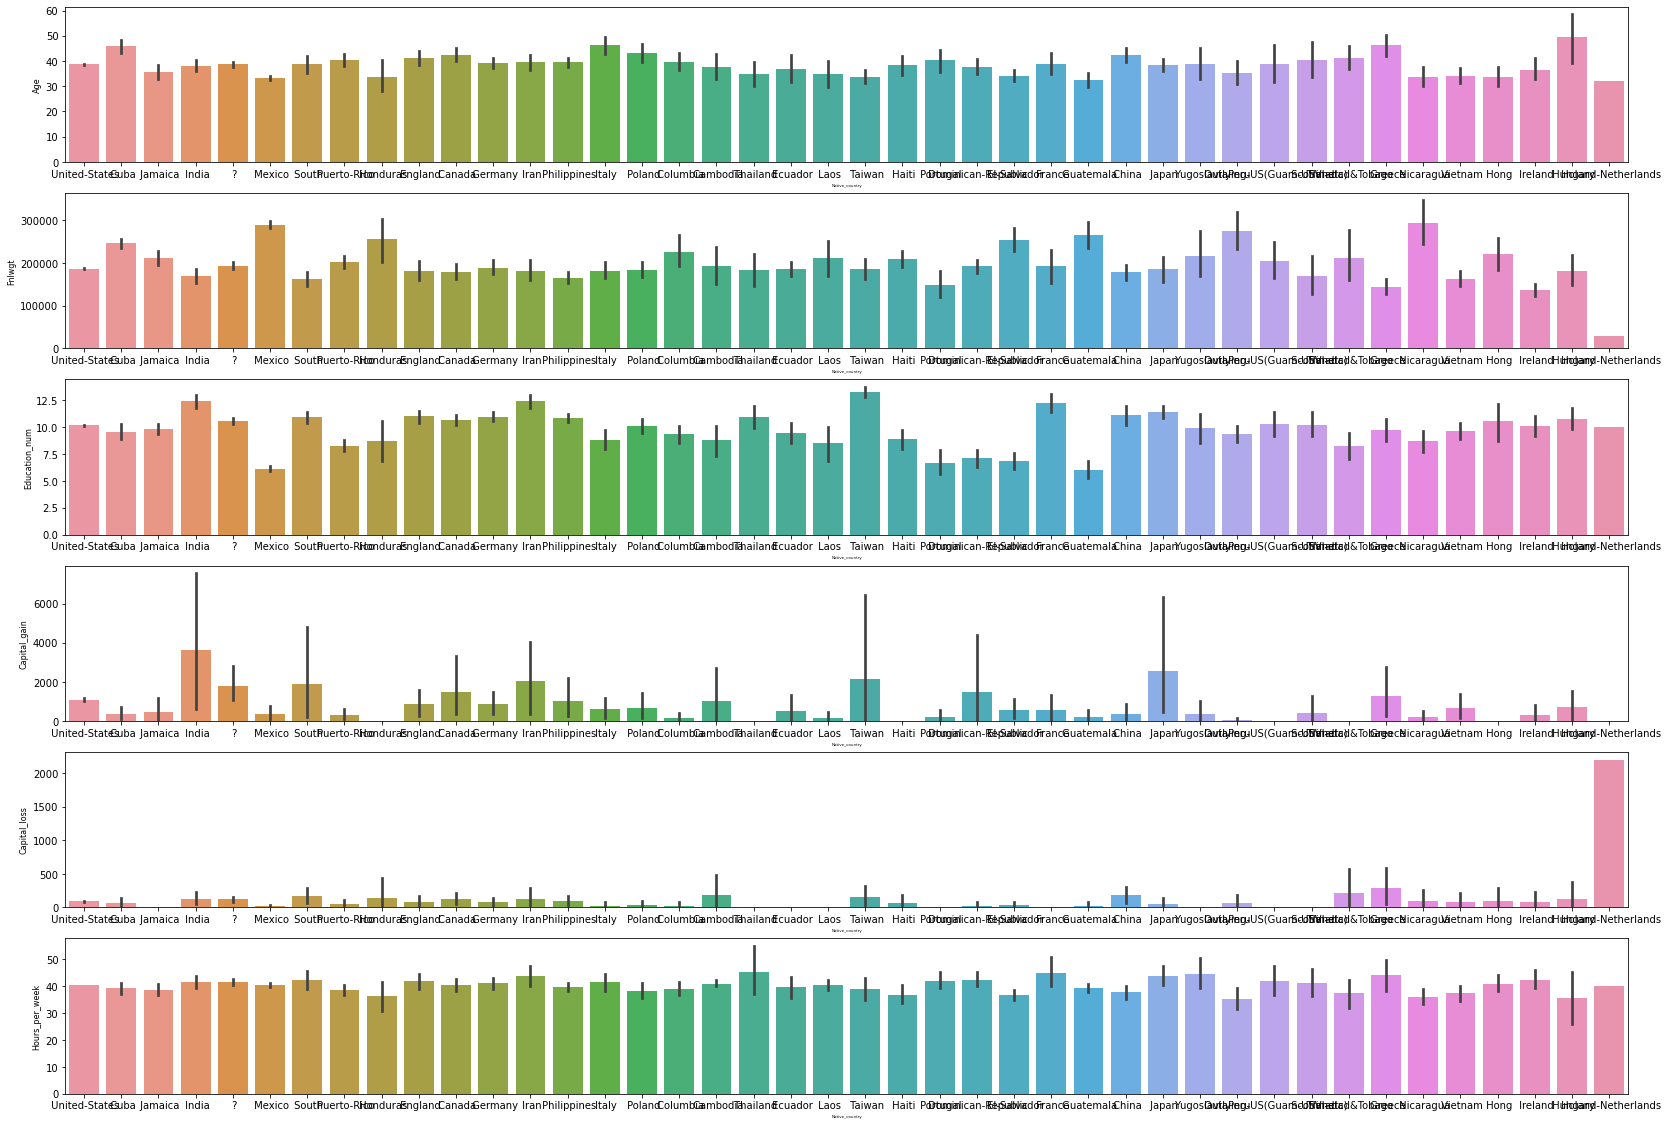

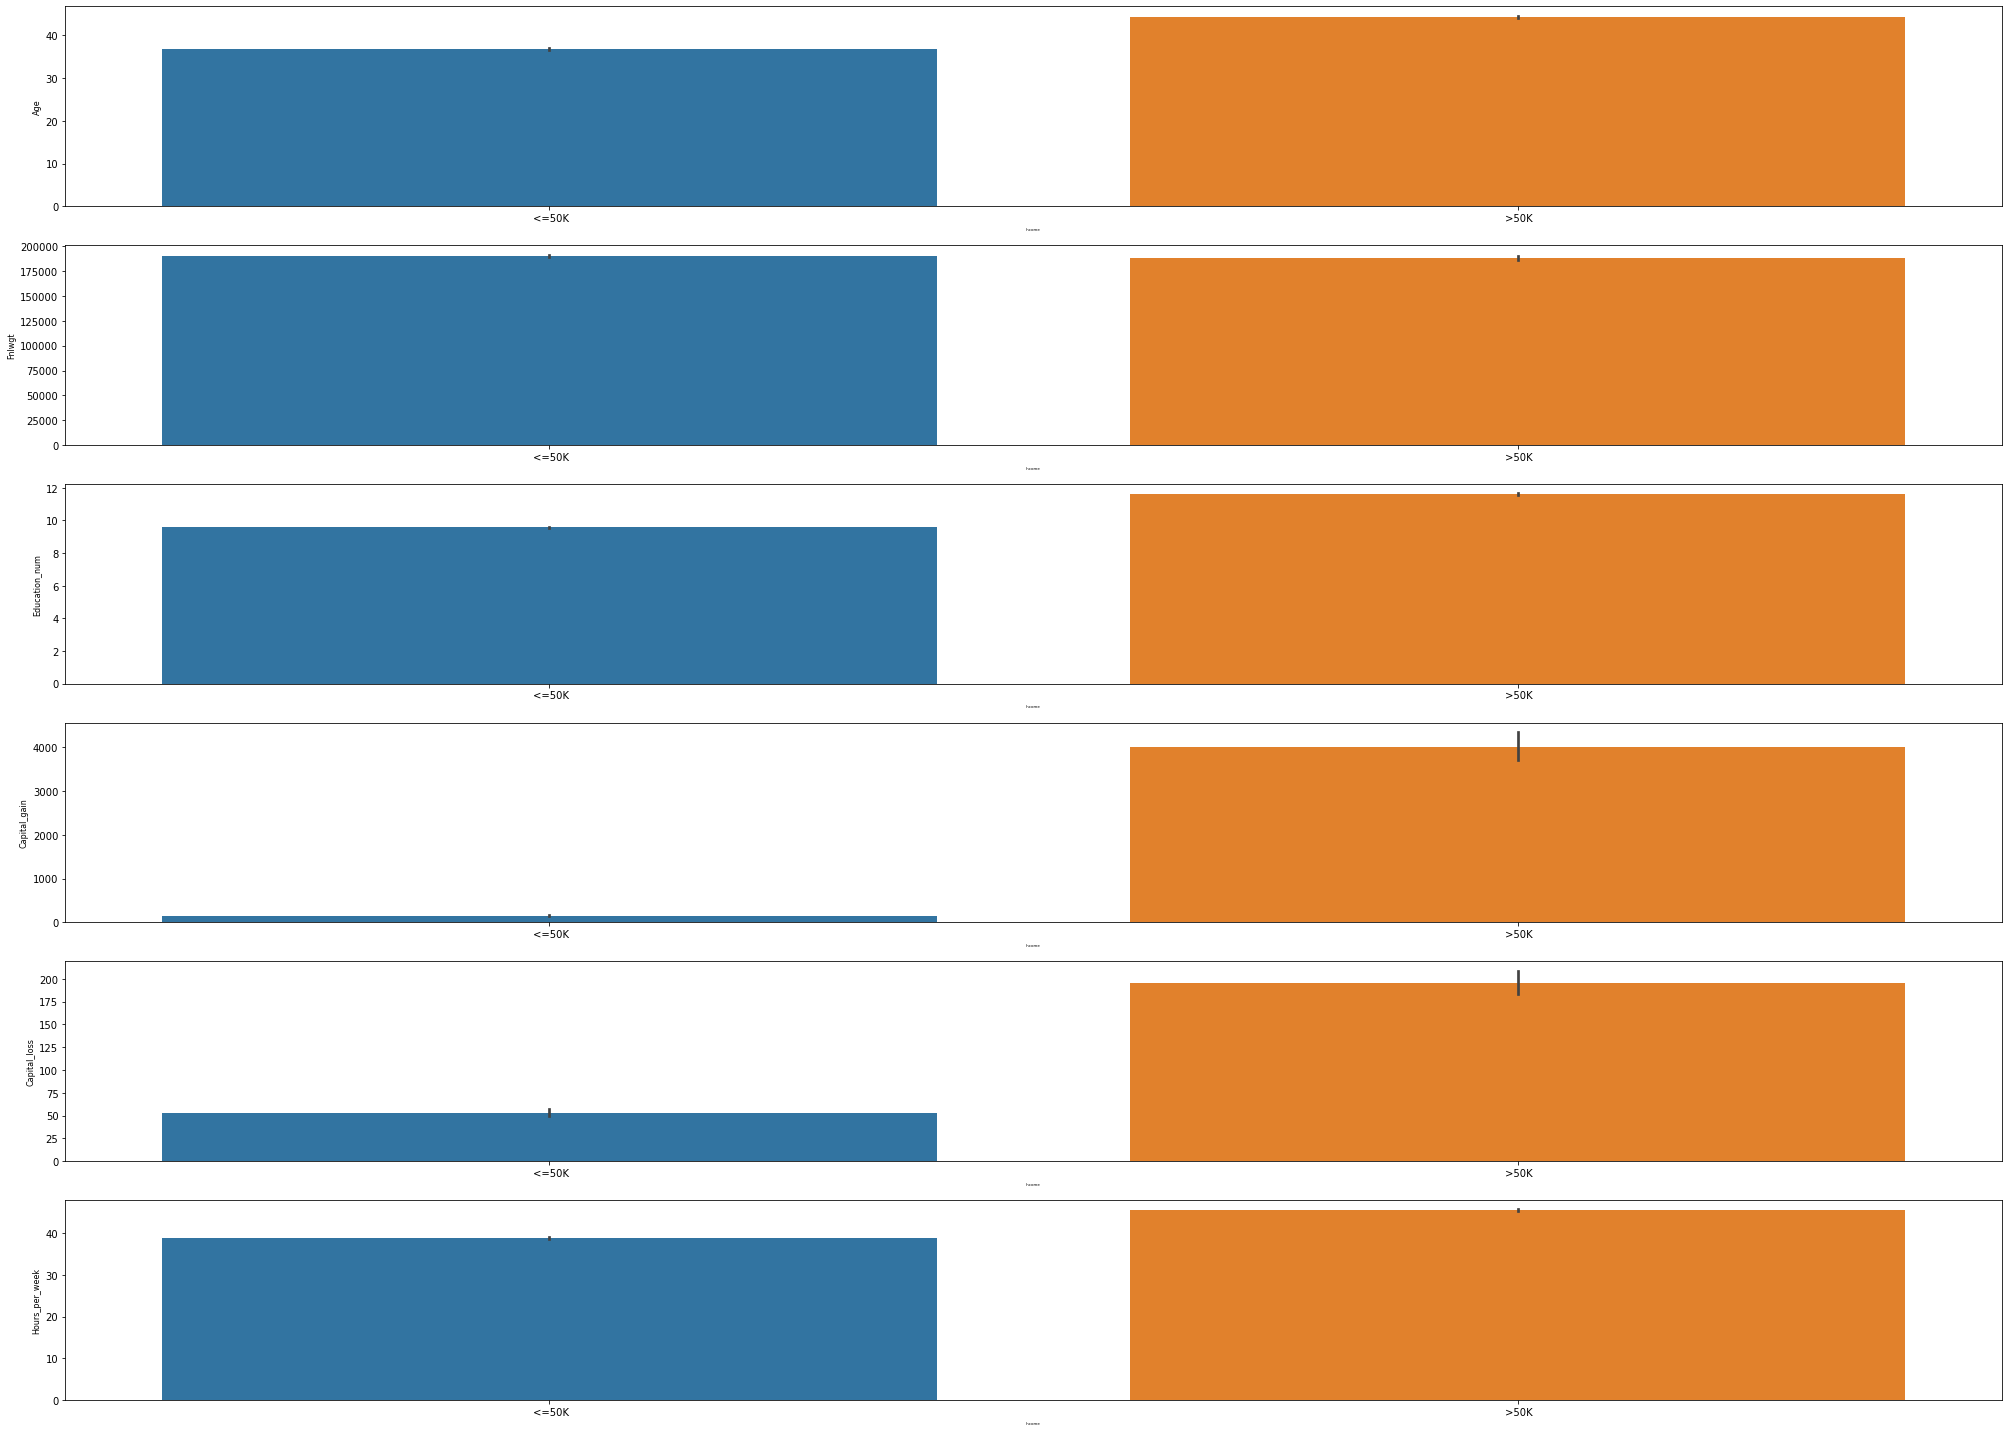

In [53]:
j =1
for row in dfo:
    if j <=9:
        plt.figure(figsize=(28,20),facecolor="white")
        plotnumber=1
        for col in df2:
            if plotnumber<=6:
                ax=plt.subplot(6,1,plotnumber)
                sns.barplot(x=dfo[row] , y=col, data=df2)
                plt.ylabel(col,fontsize=8)
                plt.xlabel(row,fontsize=4)
                
            plotnumber+=1
       
        j+=1
plt.tight_layout()

From the above graph
- Work class
    - Never-worked are under 20 mostly
    - Never-worked are  highest for fnlwgt
    - Never-Worked are lowest for Education_num
    - Self Employed have highest Capital_gain
    - Self Employed have highest Capital_loss
    - Self Employed have highest Hour_per_week
- Education
    - 7th-8th are with most age
    - 5th-6th are most Fnlwgt
    - Doctorate are most Education_num
    - Prof-school have highest Capital_gain
    - Doctorate have highest Capital_loss
    - Doctorate and Prof-school have highest Hour_per_week
- Marital_status
    - Widowed are of high age
    - Widowed are least Fnlwgt
    - Separated and Widowed are least Education_num
    - Married_civ_spouse have highest Capital_gain
    - Married_civ_spouse  have highest Capital_loss
    - Widowed have lowest Hour_per_week
- Occupation
    - Armed_force are of low age
    - Farming-fishing are least Fnlwgt
    - Private_house_service are least Education_num
    - Prof-specialty have highest Capital_gain
    - Armed_force have highest Capital_loss
    - Farming-fishing have highest Hour_per_week
- Relationship
    - Own_child are of low age
    - Other relative are most Fnlwgt
    - Other relativ are least Education_num
    - Husband have highest Capital_gain
    - Husband have highest Capital_loss
    - Husband have lowest Hour_per_week
- Race
    - Other are of least age
    - Black are highest Fnlwgt
    - Asian_pac_islander are least Education_num
    - Asian_pac_islander have highest Capital_gain
    - Asian_pac_islander have highest Capital_loss
    - All have same Hour_per_week
- Sex
    - Male are of high age
    - Male are of high Fnlwgt
    - Both are equal Education_num
    - Male are of high Capital_gain
    - Male are of high Capital_loss
    - Male are of high Hour_per_week
- Native_country
    - Holand-Netherlands are of Least age
    - Holand-Netherlands are least Fnlwgt
    - Taiwan,Indian,Iran are High Education_num
    - India have highest Capital_gain
    - Holand-Netherlands have highest Capital_loss
    - Widowed have lowest Hour_per_week
- Income
    - '>50K' are of high age
    - Equal are least Fnlwgt
    - '>50K' ate of high Education_num
    - '>50K' have highest Capital_gain
    - '>50K' have highest Capital_loss
    - '>50K' have highest Hour_per_week

### Multi-vareint analysis

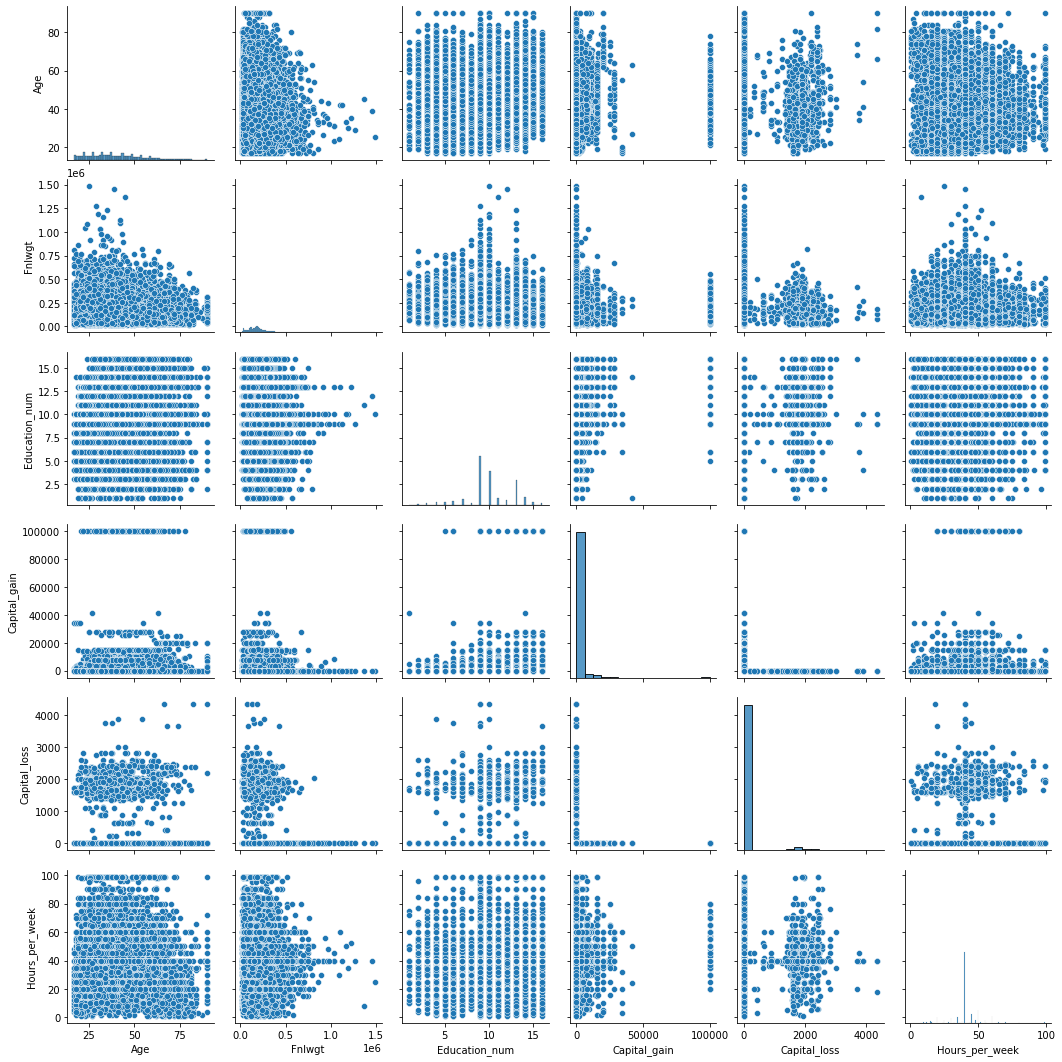

In [42]:
sns.pairplot(df2)

From the above graph we can see that
- Age and Fmlwgt have some correlation



# Feature engineering

## Checking the outliers

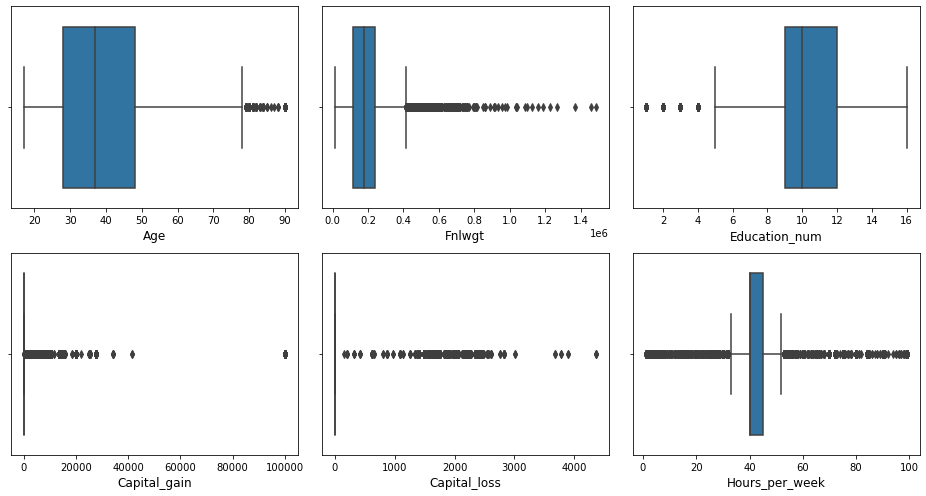

In [59]:
plt.figure(figsize=(13,7),facecolor="white")
plotnumber=1
for col in df2:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df2[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From above graph we can see that we have outliers all the continues Columns, but after analysis we found out that Age is possible, Education, hour_per week is possible 

## Checking the skewness

In [60]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

We can see that data is highly skewed for some of the columns.

## Encoding

In [62]:
# Creating backup
dfi=df

In [63]:
dfi.shape

(32560, 15)

In [61]:
dfo.nunique()

Workclass          9
Education         16
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
# Encoding the Features 
lab_enc=LabelEncoder()
encode=dfo
for i in encode:
    dfo=lab_enc.fit_transform(encode[i])
    pd.Series(dfo)
    df[i]=dfo
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [66]:
df.shape

(32560, 15)

## Treating outliers

In [67]:
x=df.drop('Income', axis=1)
y= df.Income

In [68]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(32560, 14)

In [83]:
Threshold = 4.5
outlier_indices = np.where(z > 4.5 )[0]

In [84]:
x1 = x.loc[~np.isin(np.arange(len(x)), outlier_indices)]
print(x.shape)
print(x1.shape)

(32560, 14)
(30912, 14)


In [85]:
percentagedataloss=(x.shape[0]-x1.shape[0])*100/x.shape[0]
percentagedataloss

5.061425061425061

In [86]:
y = y.loc[~np.isin(np.arange(len(y)), outlier_indices)]
print(y.shape)

(30912,)


In [87]:
x=x1

In [88]:
df=pd.concat([x,y],axis=1)
df.shape

(30912, 15)

## Checking the correlation

In [89]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,-0.001006,-0.076180,-0.012730,0.026799,-0.267027,-0.022059,-0.263955,0.024760,0.085696,0.120908,0.008061,0.064187,-0.001426,0.226231
Workclass,-0.001006,1.000000,-0.019709,0.023558,0.048143,-0.063708,0.256227,-0.089538,0.049459,0.093200,0.026942,-0.002057,0.138569,-0.003521,0.042325
Fnlwgt,-0.076180,-0.019709,1.000000,-0.029260,-0.046931,0.029558,-0.000803,0.007812,-0.017307,0.028178,-0.006622,-0.002530,-0.017819,-0.069869,-0.009697
Education,-0.012730,0.023558,-0.029260,1.000000,0.360679,-0.037500,-0.022412,-0.010022,0.016235,-0.028502,0.026755,0.009172,0.057717,0.079679,0.075841
Education_num,0.026799,0.048143,-0.046931,0.360679,1.000000,-0.063001,0.104650,-0.087486,0.034248,0.003585,0.153404,0.025081,0.142622,0.092155,0.317315
Marital_status,-0.267027,-0.063708,0.029558,-0.037500,-0.063001,1.000000,-0.008302,0.184219,-0.067750,-0.127517,-0.060643,-0.020920,-0.196689,-0.021428,-0.194404
Occupation,-0.022059,0.256227,-0.000803,-0.022412,0.104650,-0.008302,1.000000,-0.073596,0.009630,0.078619,0.020684,0.017948,0.077540,-0.003106,0.072261
Relationship,-0.263955,-0.089538,0.007812,-0.010022,-0.087486,0.184219,-0.073596,1.000000,-0.120542,-0.575730,-0.073805,-0.032143,-0.249653,-0.010806,-0.245317
Race,0.024760,0.049459,-0.017307,0.016235,0.034248,-0.067750,0.009630,-0.120542,1.000000,0.092848,0.024023,0.014418,0.047610,0.107821,0.071626
Sex,0.085696,0.093200,0.028178,-0.028502,0.003585,-0.127517,0.078619,-0.575730,0.092848,1.000000,0.065185,0.020573,0.229302,0.002141,0.210588


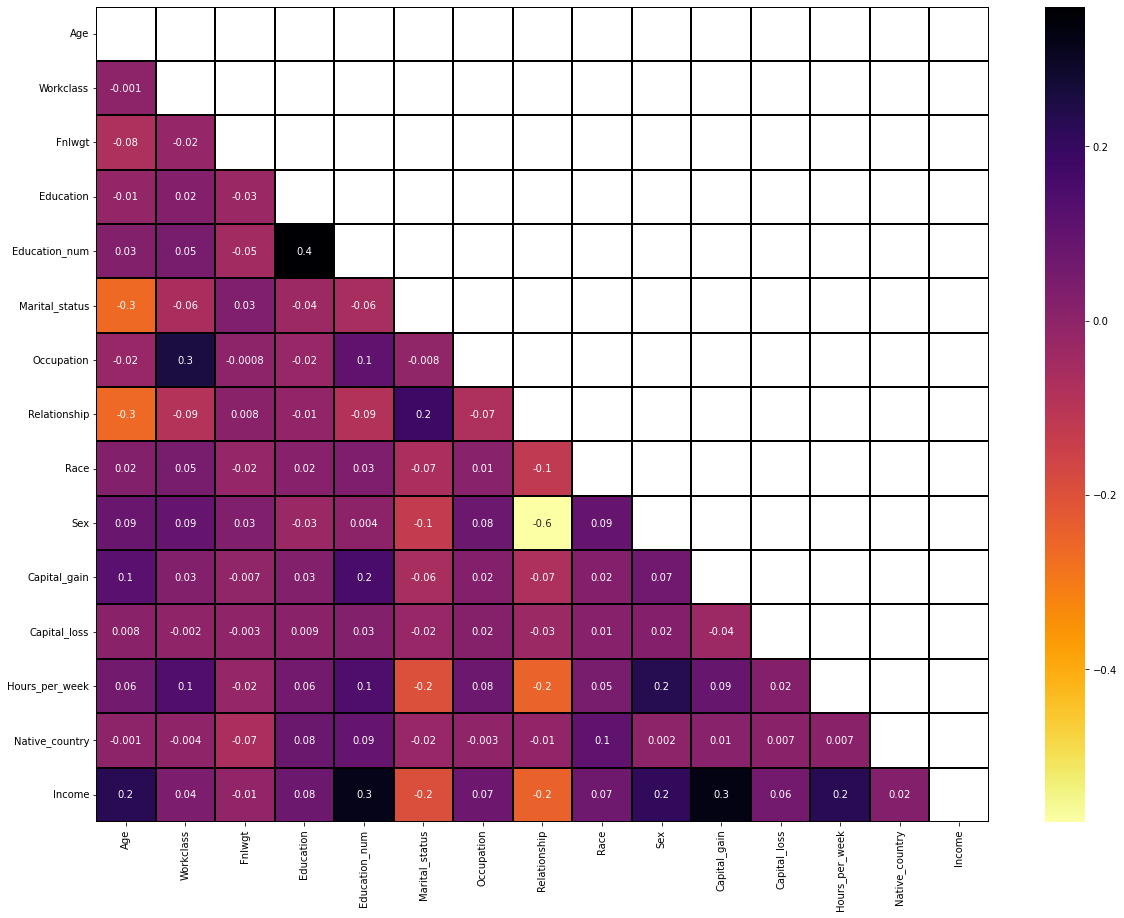

In [90]:
import numpy as np
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), mask=mask, cmap='inferno_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

Relationship and sex is correlated

## Removing skewness

In [91]:
x=df.drop('Income', axis=1)
y= df.Income

In [92]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [93]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [94]:
x=pd.DataFrame(x,columns=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'])

In [95]:
x.skew()

Age              -0.012374
Workclass         0.062444
Fnlwgt           -0.013164
Education        -0.314691
Education_num     0.028696
Marital_status   -0.123117
Occupation       -0.185704
Relationship      0.109689
Race             -2.047042
Sex              -0.691602
Capital_gain      3.089126
Capital_loss      6.135889
Hours_per_week    0.177738
Native_country   -2.930486
dtype: float64

We have remove the skewness from most of the columns but some columns are highly skewed

## Removing collinearity

In [96]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

,VIF values,Features
0,1.264167,Age
1,1.093629,Workclass
2,1.017635,Fnlwgt
3,1.094415,Education
4,1.148403,Education_num
5,1.169840,Marital_status
6,1.098898,Occupation
7,1.909666,Relationship
8,1.049667,Race
9,1.635014,Sex


VIF values is normal

## Feature selection

In [98]:
from sklearn.feature_selection import SelectKBest,f_classif

In [103]:
best_features = SelectKBest(score_func=f_classif,k=3) # run multiple time and find the best

fit=best_features.fit(x,y)

df_scores=pd.DataFrame(fit.scores_)

df_columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(14,'Score')) # print 25 best features

      Feature_Name        Score
7     Relationship  3960.793718
4    Education_num  3682.743642
10    Capital_gain  2248.106621
0              Age  2174.654938
12  Hours_per_week  1704.344604
9              Sex  1434.383444
5   Marital_status  1117.385507
8             Race   216.826835
6       Occupation   190.543346
3        Education    92.519231
11    Capital_loss    73.006500
1        Workclass    53.277816
13  Native_country    40.425563
2           Fnlwgt     1.198850


We are going to use all the feature except Fnlwgt for model building

In [104]:
x.drop("Fnlwgt", axis=1, inplace= True)

In [105]:
x.shape

(30912, 13)

## Oversampeling

In [107]:
y.value_counts()

0    23900
1     7012
Name: Income, dtype: int64

In [108]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x,y=SM.fit_resample(x,y)

In [109]:
y.value_counts()

0    23900
1    23900
Name: Income, dtype: int64

In [111]:
x.shape

(47800, 13)

# Model building

## Best random state

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print("Best accuracy is",maxAccu,"at random_state",maxRS)
   

Best accuracy is 0.7816596931659693 at random_state 155


## Train test split

In [113]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [114]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [129]:
training_score = []
testing_score = []

In [130]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 76.87089061566049
Accuracy_Score of LogisticRegression() model on Testing Data is: 78.16596931659693

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7713601277615119
Recall Score of LogisticRegression() model is: 0.8039950062421972
F1 Score of LogisticRegression() model is: 0.7873395367791891

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


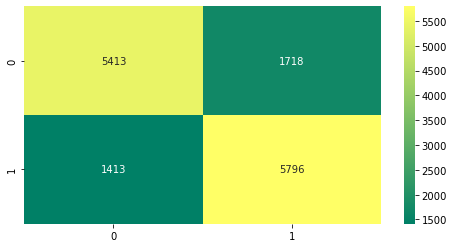

In [131]:
model_prediction(LogisticRegression())

Accuracy_Score of SVC() model on Training Data is: 82.7854154213987
Accuracy_Score of SVC() model on Testing Data is: 83.14504881450489

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7939877300613497
Recall Score of SVC() model is: 0.8976279650436954
F1 Score of SVC() model is: 0.8426329839182237

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


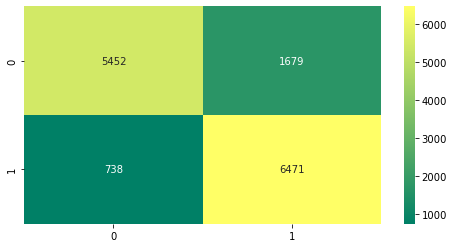

In [132]:
model_prediction(SVC())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.44889420203228
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 85.3765690376569

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.8615275813295615
Recall Score of DecisionTreeClassifier() model is: 0.844916077125815
F1 Score of DecisionTreeClassifier() model is: 0.8531409762588416

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


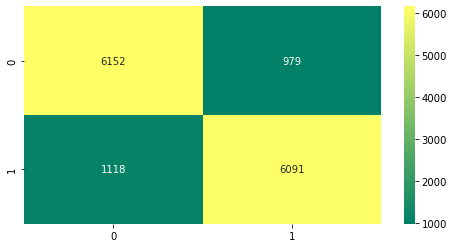

In [133]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.44889420203228
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 89.06555090655509

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.88716540837337
Recall Score of RandomForestClassifier() model is: 0.8965182410875294
F1 Score of RandomForestClassifier() model is: 0.8918173037118807

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


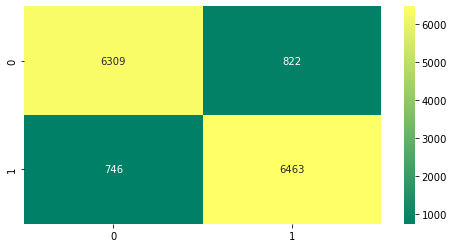

In [134]:
model_prediction(RandomForestClassifier())

Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 98.44889420203228
Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 89.1213389121339

------------------------------------------------------------------------
Precision Score of ExtraTreesClassifier() model is: 0.8848616977789889
Recall Score of ExtraTreesClassifier() model is: 0.9008184214176723
F1 Score of ExtraTreesClassifier() model is: 0.8927687654660434

------------------------------------------------------------------------
Confusion Matrix of ExtraTreesClassifier() model is:


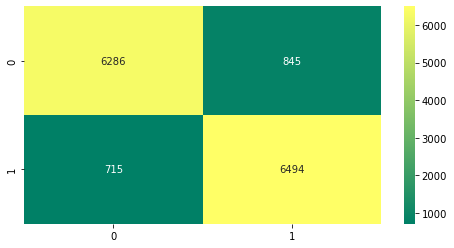

In [135]:
model_prediction(ExtraTreesClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 84.31858936043037
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 84.50488145048814

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.8271880330665267
Recall Score of AdaBoostClassifier() model is: 0.8744624774587322
F1 Score of AdaBoostClassifier() model is: 0.8501685772083615

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


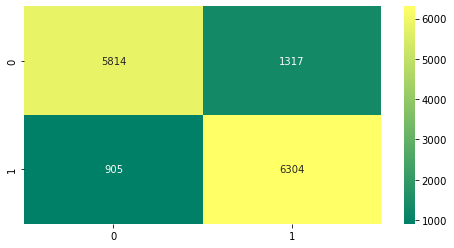

In [136]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 85.7949790794979
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 85.976290097629

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.8344055584148224
Recall Score of GradientBoostingClassifier() model is: 0.8995699819669857
F1 Score of GradientBoostingClassifier() model is: 0.8657633001802282

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


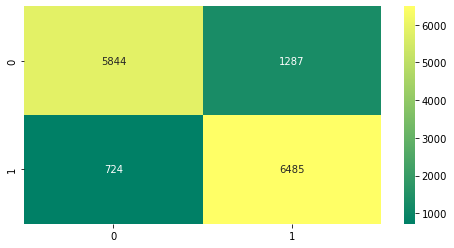

In [137]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 92.35803945008966
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_st

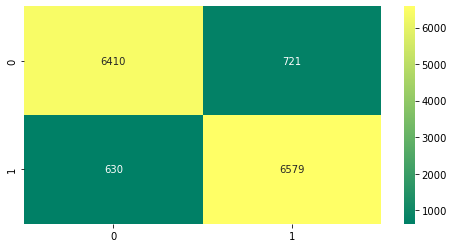

In [138]:
model_prediction(XGBClassifier())

In [139]:
testing_score

[78.16596931659693,
 83.14504881450489,
 85.3765690376569,
 89.06555090655509,
 89.1213389121339,
 84.50488145048814,
 85.976290097629,
 90.57880055788006]

In [140]:
models = ["Logistic Regression","SVM","Decision Tree","Random Forest","Extra Tree","Ada Boost",
          "Gradient Boost","XGBoost"]

In [141]:
df3 = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [142]:
df3

,Algorithms,Training Score,Testing Score
0,Logistic Regression,76.870891,78.165969
1,SVM,82.785415,83.145049
2,Decision Tree,98.448894,85.376569
3,Random Forest,98.448894,89.065551
4,Extra Tree,98.448894,89.121339
5,Ada Boost,84.318589,84.504881
6,Gradient Boost,85.794979,85.976290
7,XGBoost,92.358039,90.578801


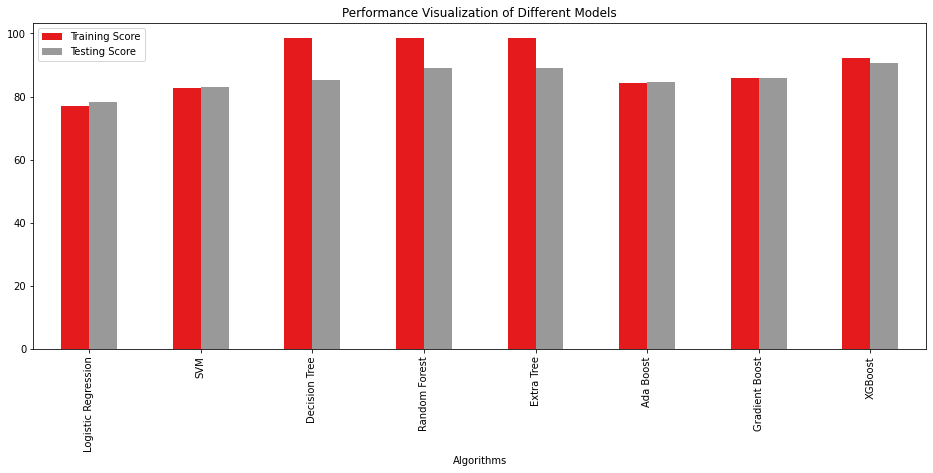

In [143]:
df3.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## Cross Validation

In [144]:
from sklearn.model_selection import cross_val_score

### Finding the best CV value

In [145]:
num_folds_range = range(2, 20)

model = LogisticRegression()

fold_performance = {}

for num_folds in num_folds_range:
    scores = cross_val_score(model, x, y, cv=num_folds, scoring='accuracy')  # or other classification scoring metrics
    fold_performance[num_folds] = {
        'mean': np.mean(scores),
        'std': np.std(scores)
    }

df_fold_performance = pd.DataFrame(fold_performance).transpose()

print(df_fold_performance)

        mean       std
2   0.772490  0.001569
3   0.772448  0.002559
4   0.772448  0.003001
5   0.772552  0.003935
6   0.772448  0.005591
7   0.772594  0.006682
8   0.772364  0.004545
9   0.772636  0.005744
10  0.772510  0.004739
11  0.772594  0.006316
12  0.772427  0.006495
13  0.772657  0.006938
14  0.772573  0.008302
15  0.772406  0.005913
16  0.772511  0.007296
17  0.772511  0.008877
18  0.772406  0.009550
19  0.772532  0.007613


CV value 3 is best tradeoff value

In [146]:
# checking cv score for logistic Regression
score = cross_val_score(LogisticRegression(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[0]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[0]/100)- score.mean())

[0.77049077 0.77079018 0.77606226]
0.7724477396854653
0.7816596931659693
Differnet between Accuracy score and cross validation score is-  0.009211953480503965


In [147]:
# checking cv score for SVC
score = cross_val_score(SVC(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[1]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[1]/100)- score.mean())

[0.81768545 0.82489173 0.82903408]
0.8238704222797028
0.8314504881450488
Differnet between Accuracy score and cross validation score is-  0.007580065865346097


In [148]:
# checking cv score for DecisionTreeClassifier
score = cross_val_score(DecisionTreeClassifier(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[2]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[2]/100)- score.mean())

[0.78228944 0.87729869 0.87183832]
0.8438088183969548
0.853765690376569
Differnet between Accuracy score and cross validation score is-  0.009956871979614257


In [149]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RandomForestClassifier(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[3]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[3]/100)- score.mean())

[0.83111585 0.90949601 0.90930773]
0.8833065311857383
0.8906555090655509
Differnet between Accuracy score and cross validation score is-  0.00734897787981259


In [150]:
# checking cv score for ExtraTreesClassifier
score = cross_val_score(ExtraTreesClassifier(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[4]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[4]/100)- score.mean())

[0.85628216 0.90830352 0.90842905]
0.8910049105177111
0.891213389121339
Differnet between Accuracy score and cross validation score is-  0.00020847860362782633


In [151]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[5]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[5]/100)- score.mean())

[0.81875235 0.85156593 0.85357434]
0.8412975427863877
0.8450488145048815
Differnet between Accuracy score and cross validation score is-  0.003751271718493765


In [152]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GradientBoostingClassifier(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[6]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[6]/100)- score.mean())

[0.82314548 0.86725664 0.86505994]
0.8518206835817678
0.85976290097629
Differnet between Accuracy score and cross validation score is-  0.007942217394522277


In [153]:
# checking cv score for XGBClassifier
score = cross_val_score(XGBClassifier(),x,y,cv=3)
print(score)
print(score.mean())
print(testing_score[7]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[7]/100)- score.mean())

[0.71714573 0.92757171 0.92989393]
0.8582037878255586
0.9057880055788006
Differnet between Accuracy score and cross validation score is-  0.04758421775324195


DecisionTreeClassifier,ExtraTreesClassifier, XGBClassifier are best performing model with least difference in score

# Hyperparameter tuning

In [154]:
from sklearn.model_selection import GridSearchCV

## DecisionTreeClassifier

In [155]:
model1 = DecisionTreeClassifier()
parameters1 ={'criterion':['gini', 'entropy','log_loss'],
             'min_samples_split':[3,5,6,7,9],
             'max_features':['auto','sqrt', 'log2'],
             'random_state':[75,100,150]
             }

grid_search1 = GridSearchCV(model1, parameters1, cv=3, n_jobs=-1)
grid_search1.fit(x_train,y_train)
grid_search1.best_score_

0.8376569793953182

In [156]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_split': 6,
 'random_state': 75}

In [157]:
model1=DecisionTreeClassifier(criterion= 'gini', max_features= 'auto', min_samples_split= 6, random_state= 75)

In [158]:
model1.fit(x_train,y_train)

x_test_pred1 = model1.predict(x_test)

accuracy_score(y_test,x_test_pred1)

0.848186889818689

## ExtraTreesClassifier

In [164]:
model2 = ExtraTreesClassifier()
parameters2 ={'criterion':['gini', 'entropy','log_loss'],
              'max_features':[None,'sqrt', 'log2'],
             'n_estimators':[50,100,200],
              'min_samples_split':[3,5,6,7,9]
             }

grid_search2 = GridSearchCV(model2, parameters2, cv=13, n_jobs=-1)
grid_search2.fit(x_train,y_train)
grid_search2.best_score_

0.8924687395344216

In [165]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'criterion': 'log_loss',
 'max_features': None,
 'min_samples_split': 7,
 'n_estimators': 200}

In [166]:
model2=ExtraTreesClassifier(criterion= 'log_loss',min_samples_split=7,max_features=None,n_estimators= 200)

In [167]:
model2.fit(x_train,y_train)

x_test_pred2 = model2.predict(x_test)

accuracy_score(y_test,x_test_pred2)

0.8979776847977685

## XGBClassifier

In [159]:
model3=XGBClassifier()

In [160]:
parameters3 ={'booster':['gbtree', 'gblinear', 'dart'],
             'learning_rate':[0.005,.01,.02],
             'disable_default_eval_metric':[True,False],
             'max_depth':[5,6,7]
             }

grid_search3 = GridSearchCV(model3, parameters3, cv=13, n_jobs=-1)
grid_search3.fit(x_train,y_train)
grid_search3.best_score_

0.8448293280126816

In [161]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'booster': 'gbtree',
 'disable_default_eval_metric': True,
 'learning_rate': 0.02,
 'max_depth': 7}

In [162]:
model3=XGBClassifier(booster= 'gbtree',disable_default_eval_metric= True,learning_rate= 0.02,max_depth= 7)

In [163]:
model3.fit(x_train,y_train)

x_test_pred3 = model3.predict(x_test)

accuracy_score(y_test,x_test_pred3)

0.8499302649930265

## AUC

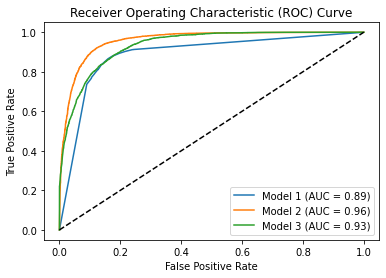

AUC Score for Model 1: 0.848275332224193
AUC Score for Model 2: 0.8978946290959515
AUC Score for Model 3: 0.849579882296664


In [168]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

# Calculate and plot ROC curve for model1
y_pred_prob1 = model1.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label='Model 1 (AUC = %0.2f)' % roc_auc1)

# Calculate and plot ROC curve for model2
y_pred_prob2 = model2.predict_proba(x_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='Model 2 (AUC = %0.2f)' % roc_auc2)

# Calculate and plot ROC curve for model3
y_pred_prob3 = model3.predict_proba(x_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='Model 3 (AUC = %0.2f)' % roc_auc3)

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC scores
auc_score1 = roc_auc_score(y_test, model1.predict(x_test))
print('AUC Score for Model 1:', auc_score1)

auc_score2 = roc_auc_score(y_test, model2.predict(x_test))
print('AUC Score for Model 2:', auc_score2)

auc_score3 = roc_auc_score(y_test, model3.predict(x_test))
print('AUC Score for Model 3:', auc_score3)


Best model is model 2 which is  XGBClassifier

## Saving the model

In [169]:
# Saving the model using .pkl
import joblib
joblib.dump(model2,"Census.pkl")

['Census.pkl']

## Laoding the model

In [170]:
# Let's load the saved model and get the predictions
model=joblib.load("Census.pkl")

In [171]:
# Prediction
prediction=model.predict(x_test)

In [172]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,1,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
14335,0,1
14336,1,1
14337,1,1
14338,1,1
